In [2]:
import anndata as ad
import matplotlib.pyplot as plt
import scanpy as sc
import warnings
import pandas as pd
import seaborn as sns
import numpy as np
from anndata import ImplicitModificationWarning
warnings.filterwarnings("ignore", category=UserWarning, module="scanpy")
warnings.filterwarnings("ignore", category=ImplicitModificationWarning)

In [3]:
# Load the data
adata_C = ad.read_h5ad('adata_C_FINAL.h5ad')

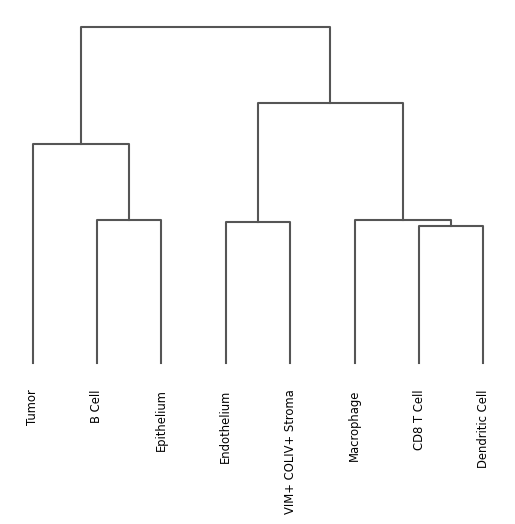

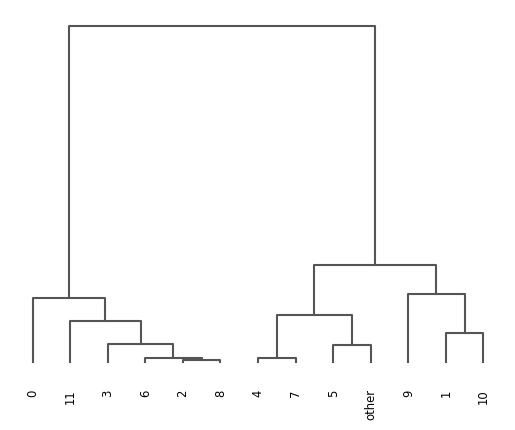

<Axes: >

In [3]:
sc.tl.dendrogram(adata_C, groupby='cellType', linkage_method='ward')
sc.pl.dendrogram(adata_C, groupby='cellType')

sc.tl.dendrogram(adata_C, groupby='nicheCollapsed', linkage_method='ward')
sc.pl.dendrogram(adata_C, groupby='nicheCollapsed') 

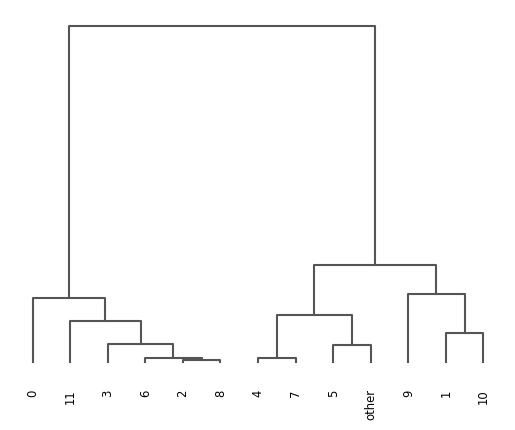

<Axes: >

In [13]:
sc.tl.dendrogram(adata_C, groupby='nicheCollapsed', linkage_method='ward')
sc.pl.dendrogram(adata_C, groupby='nicheCollapsed', save='DendrogramNiche.png')

In [ ]:
# Load the data
adata_C = ad.read_h5ad('adata_C_FINAL.h5ad')

# Define the color mapping for cell types
cell_type_colors = {
    'Dendritic Cell': '#DD933C',
    'Macrophage': '#78CBC9',
    'Epithelium': '#CC9BBD',
    'B Cell': '#BAB733',
    'VIM+ COLIV+ Stroma': '#EB008B',
    'Endothelium': '#AA4456',
    'CD8 T Cell': '#2FA516',
    'Tumor': '#144577'
}

# Apply the color mapping to the AnnData object
adata_C.uns['cellType_colors'] = [cell_type_colors[ct] for ct in adata_C.obs['cellType'].cat.categories]

# Create a list of TMA positions
rows = range(1, 16)
cols = [chr(i) for i in range(ord('A'), ord('G') + 1)]
all_positions = [f'{c}{r}' for r in rows for c in cols]

# Get the unique TMAs from the data
TMAs = adata_C.obs['batch'].unique()

# Create the figure and axes for the main plot
fig, axes = plt.subplots(nrows=15, ncols=7, figsize=(20, 40))

# Plot each TMA in the correct position, leaving blanks for missing TMAs
for pos, ax in zip(all_positions, axes.flat):
    if pos in TMAs:
        sc.pl.embedding(adata_C[adata_C.obs['batch'] == pos], basis='spatial', color='cellType', ax=ax, show=False, size=10)
        ax.set_title(f'{pos}')
    else:
        ax.set_facecolor('white')  # Set blank background for missing TMAs
        ax.axis('off')  # Remove axes for missing TMAs
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_aspect('equal')
    ax.set_facecolor('white')
    ax.spines['top'].set_edgecolor('none')
    ax.spines['bottom'].set_edgecolor('none')
    ax.spines['left'].set_edgecolor('none')
    ax.spines['right'].set_edgecolor('none')
    legend = ax.get_legend()
    if legend:
        legend.remove()

# Hide any remaining subplots that aren't used
for ax in axes.flat[len(all_positions):]:
    ax.axis('off')

# Set the overall title and layout
# fig.suptitle('Neuro TMA Manual Cell Annotations', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 1])
# plt.show()
# plt.savefig('CellTypeMap.png',format="png",bbox_inches="tight",dpi=300)
plt.savefig('CellTypeMap.pdf',format="pdf",bbox_inches="tight")

# Create a separate figure for the legend
fig_legend = plt.figure(figsize=(10, 5))
ax_legend = fig_legend.add_subplot(111)
ax_legend.axis('off')

# Create the legend in the new figure
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in cell_type_colors.values()]
legend_labels = list(cell_type_colors.keys())
ax_legend.legend(legend_handles, legend_labels, loc='center', ncol=2)

plt.tight_layout()
# plt.show()
plt.savefig('CellTypeMap_Legend.pdf',format="pdf",bbox_inches="tight")

In [ ]:
# Define the color mapping for cell types
niche_colors = {
    '0':'#287D47',
    '1':'#728ACF',
    '2':'#BF2C49',
    '3':'#5E4E63',
    '4':'#BFB3A8',
    '5':'#787D6E',
    '6':'#6AE5FC',
    '7':'#907B96',
    '8':'#BD9C80',
    '9':'#B4CC89',
    '10':'#C9FC6A',
    '11':'#DA6AFC',
    'other':'#FCAD6A'
}

# Apply the color mapping to the AnnData object
adata_C.uns['nicheCollapsed_colors'] = [niche_colors[ct] for ct in adata_C.obs['nicheCollapsed'].cat.categories]

# Create a list of TMA positions
rows = range(1, 16)
cols = [chr(i) for i in range(ord('A'), ord('G') + 1)]
all_positions = [f'{c}{r}' for r in rows for c in cols]

# Get the unique TMAs from the data
TMAs = adata_C.obs['batch'].unique()

# Create the figure and axes for the main plot
fig, axes = plt.subplots(nrows=15, ncols=7, figsize=(20, 40))

# Plot each TMA in the correct position, leaving blanks for missing TMAs
for pos, ax in zip(all_positions, axes.flat):
    if pos in TMAs:
        sc.pl.embedding(adata_C[adata_C.obs['batch'] == pos], basis='spatial', color='nicheCollapsed', ax=ax, show=False, size=10)
        ax.set_title(f'{pos}')
    else:
        ax.set_facecolor('white')  # Set blank background for missing TMAs
        ax.axis('off')  # Remove axes for missing TMAs
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_aspect('equal')
    ax.set_facecolor('white')
    ax.spines['top'].set_edgecolor('none')
    ax.spines['bottom'].set_edgecolor('none')
    ax.spines['left'].set_edgecolor('none')
    ax.spines['right'].set_edgecolor('none')
    legend = ax.get_legend()
    if legend:
        legend.remove()

# Hide any remaining subplots that aren't used
for ax in axes.flat[len(all_positions):]:
    ax.axis('off')

# Set the overall title and layout
# fig.suptitle('Neuro TMA Manual Cell Annotations', fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 1])
# plt.show()
# plt.savefig('NicheMap.png',format="png",bbox_inches="tight", dpi=300)
plt.savefig('NicheMap.pdf',format="pdf",bbox_inches="tight")

# Create a separate figure for the legend
fig_legend = plt.figure(figsize=(10, 5))
ax_legend = fig_legend.add_subplot(111)
ax_legend.axis('off')

# Create the legend in the new figure
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in niche_colors.values()]
legend_labels = list(niche_colors.keys())
ax_legend.legend(legend_handles, legend_labels, loc='center', ncol=2)

plt.tight_layout()
# plt.show()
plt.savefig('NicheMap_Legend.pdf',format="pdf",bbox_inches="tight")

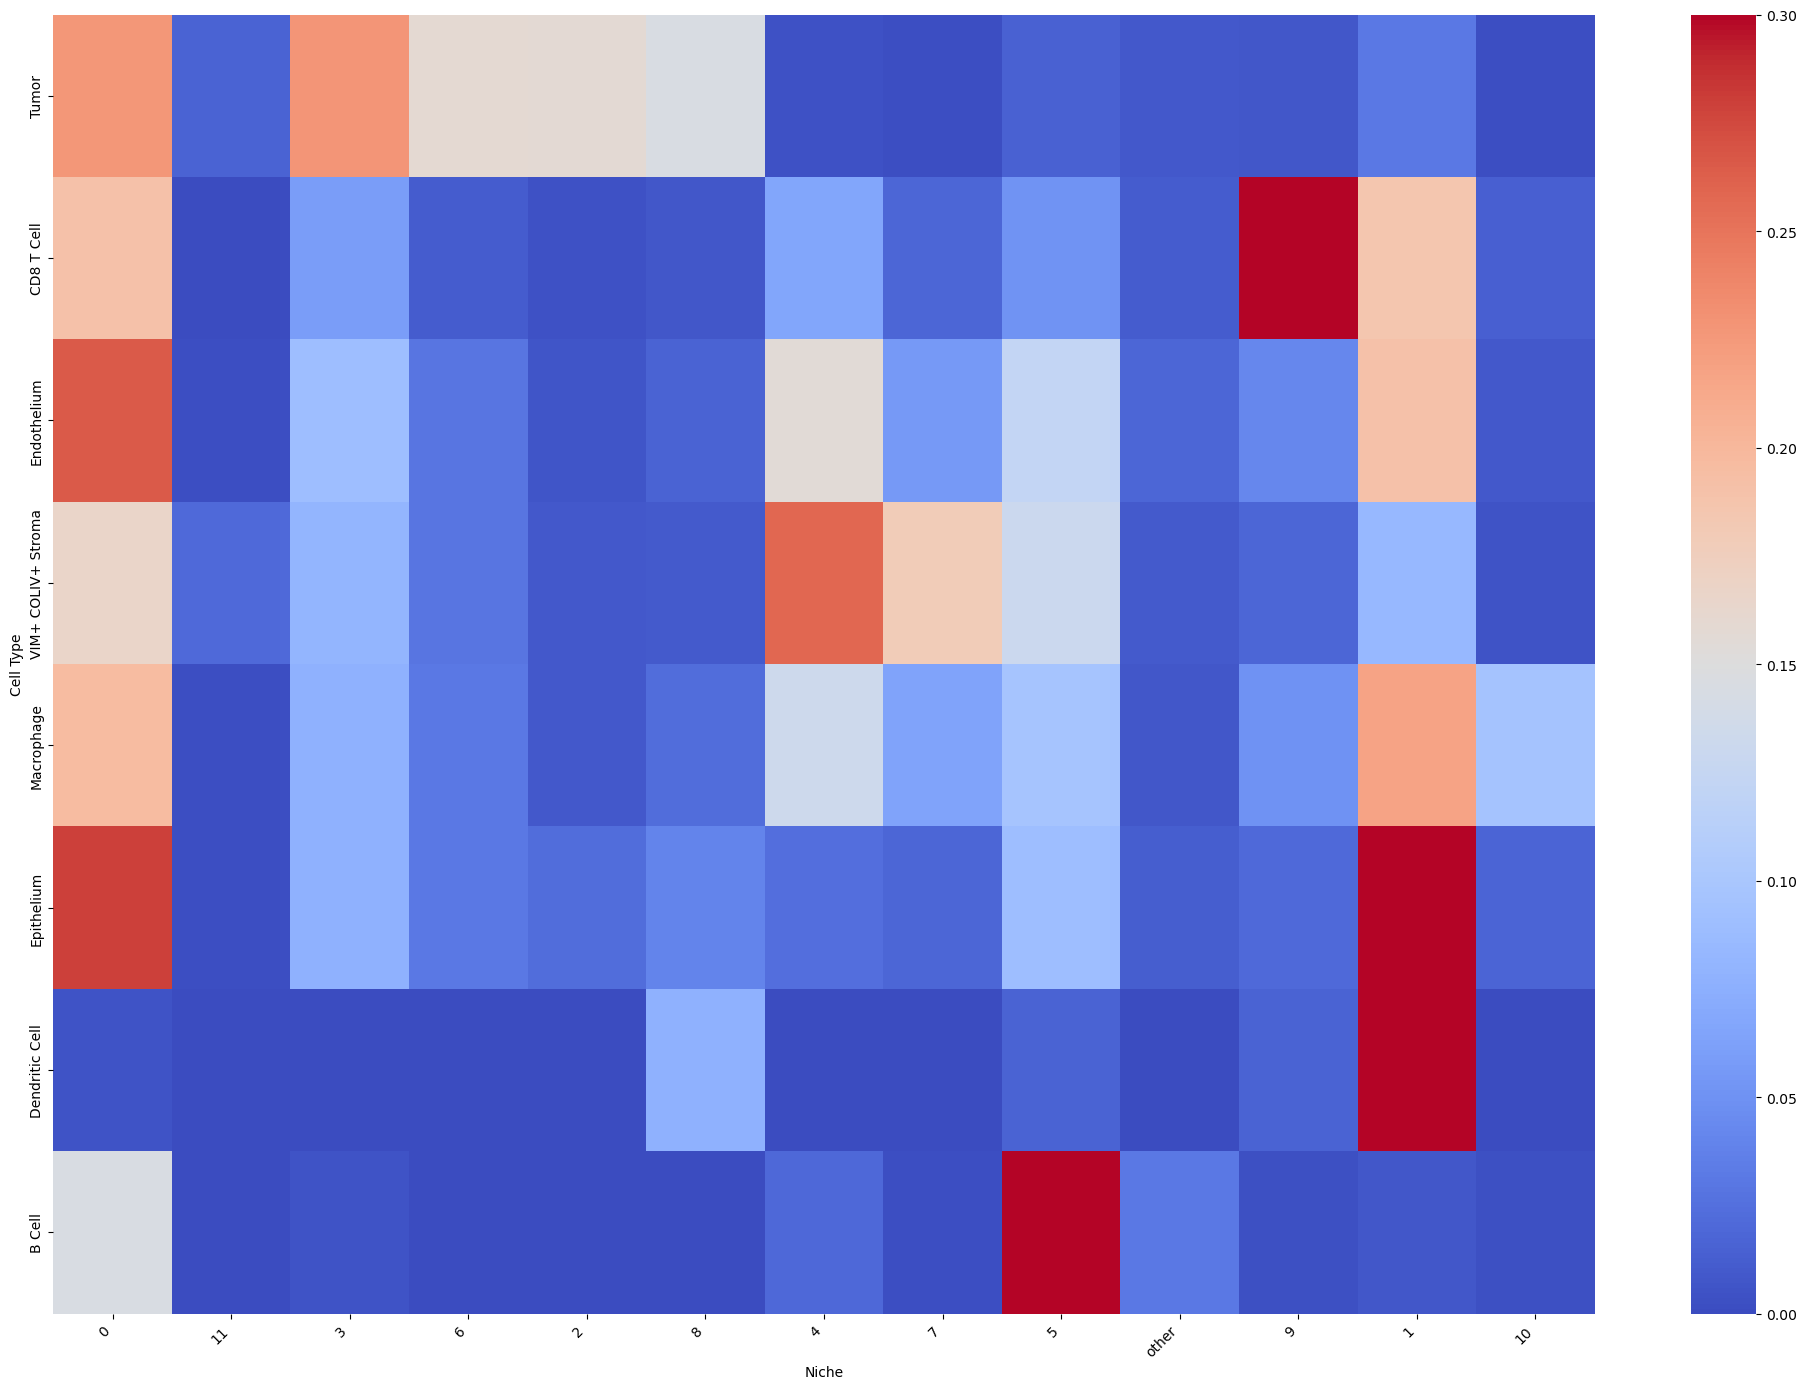

In [10]:
# orderings
order_ct = ['Tumor','CD8 T Cell','Endothelium','VIM+ COLIV+ Stroma','Macrophage',
            'Epithelium','Dendritic Cell','B Cell']
order_niche = ['0','11','3','6','2','8','4','7','5','other','9','1','10']
            
# Assuming adata is your anndata object
# Create a DataFrame from adata.obs
obs_df = adata_C.obs

# Calculate the contingency table
contingency_table = pd.crosstab(obs_df['cellType'], obs_df['nicheCollapsed'])

# Normalize the contingency table (Optional)
contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)

# Order the rows and columns according to the specified orderings
contingency_table_normalized = contingency_table_normalized.reindex(index=order_ct, columns=order_niche)

# Create the heatmap using seaborn
plt.figure(figsize=(20, 14))  # Adjust figsize if necessary
sns.heatmap(contingency_table_normalized, annot=False, cmap='coolwarm', cbar=True, vmax=0.3)
plt.xlabel('Niche')
plt.ylabel('Cell Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('HeatMap.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
adata_C.obs.to_csv('ObjectMetadata.csv', index=False)
np.savetxt('UMAPCoords.csv', adata_C.obsm['X_umap'], delimiter=',')

In [ ]:
# Plot UMAP for cellType
sc.pl.umap(adata_C, color='cellType', show=False)
ax = plt.gca()
ax.set_title('')
ax.set_axis_off()
for spine in ax.spines.values():
    spine.set_visible(False)
plt.savefig('UMAP_CellType.pdf', format='pdf', bbox_inches='tight')
plt.savefig('UMAP_CellType.png', format='png', bbox_inches='tight', dpi=300)
plt.show()

# Plot UMAP for leiden
sc.pl.umap(adata_C, color='leiden', show=False)
ax = plt.gca()
ax.set_title('')
ax.set_axis_off()
for spine in ax.spines.values():
    spine.set_visible(False)
plt.savefig('UMAP_Leiden.pdf', format='pdf', bbox_inches='tight')
plt.savefig('UMAP_Leiden.png', format='png', bbox_inches='tight', dpi=300)
plt.show()